## Plan: 
1. read the torch embeddings 
2. plot 
3. try different ML approaches downstream 

### Exploratory Data Analysis on Training and Test seuqnece data

##### Sequence Length 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/cy/fs36cmbs1qqfq95ndcyk22mw0000gn/T/ipykernel_90440/3131204507.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(seqlen)


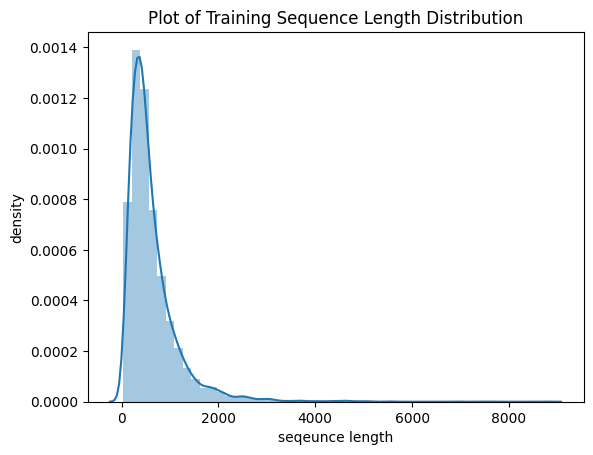

In [9]:
df = pd.read_csv('../train.csv')
seqlen = df.sequence.apply(lambda s: len(s))

fig = sns.distplot(seqlen)
fig.set_xlabel('seqeunce length')
fig.set_ylabel('density')
fig.set_title('Plot of Training Sequence Length Distribution')

plt.savefig('../sequence_length_distribution.png')

/var/folders/cy/fs36cmbs1qqfq95ndcyk22mw0000gn/T/ipykernel_90440/3276307114.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(seqlen)


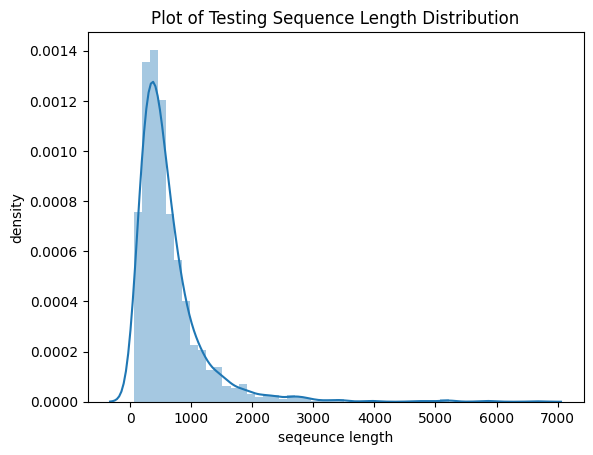

In [10]:
df = pd.read_csv('../test.csv')
seqlen = df.sequence.apply(lambda s: len(s))

fig = sns.distplot(seqlen)
fig.set_xlabel('seqeunce length')
fig.set_ylabel('density')
fig.set_title('Plot of Testing Sequence Length Distribution')

plt.savefig('../sequence_length_distribution_test.png')

##### Base Composition

In [2]:
from matplotlib import cm
import matplotlib.pyplot as plt

import numpy as np

/var/folders/cy/fs36cmbs1qqfq95ndcyk22mw0000gn/T/ipykernel_6530/1162074762.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = cm.get_cmap('tab20b', 20)  # Get the 'tab20b' colormap
/var/folders/cy/fs36cmbs1qqfq95ndcyk22mw0000gn/T/ipykernel_6530/1162074762.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = cm.get_cmap('tab20c', 20)  # Get the 'tab20c' colormap


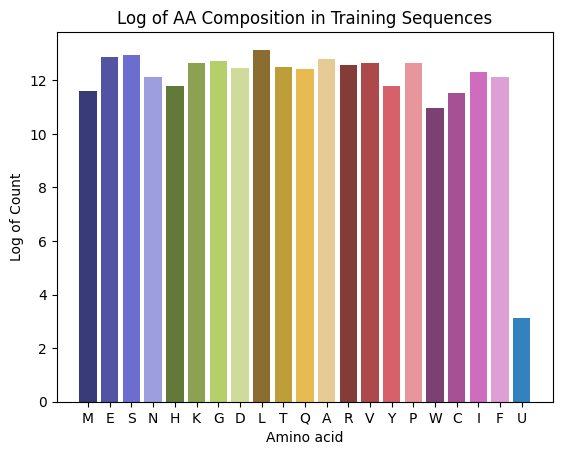

In [29]:
df = pd.read_csv('../train.csv')


def get_basecomp(s):
    for keys in s:
        res_train[keys] = res_train.get(keys, 0) + 1
    
res_train = {}    
df.sequence.apply(lambda s: get_basecomp(s))


# plt.bar(), np.log(list(res.values())),cmap=matplotlib.colors.Qualitative.Viridis)


keys= list(res_train.keys())
values = np.log(list(res_train.values()))
                
# Set the color map
cmap1 = cm.get_cmap('tab20b', 20)  # Get the 'tab20b' colormap
cmap2 = cm.get_cmap('tab20c', 20)  # Get the 'tab20c' colormap
colors1 = cmap1(np.linspace(0, 1, 20))
colors2 = cmap2(np.linspace(0, 1, 20))

# Combine colors from both colormaps and select the first 21
colors = np.vstack((colors1, colors2))[:21]

# Create bar plot
plt.bar(keys, values, color=colors)
plt.xlabel('Amino acid')
plt.ylabel('Log of Count')
plt.title('Log of AA Composition in Training Sequences')
# plt.show()

plt.savefig('../Comp_Training.png')
# plt.show()

/var/folders/cy/fs36cmbs1qqfq95ndcyk22mw0000gn/T/ipykernel_6530/3458984384.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = cm.get_cmap('tab20b', 20)  # Get the 'tab20b' colormap
/var/folders/cy/fs36cmbs1qqfq95ndcyk22mw0000gn/T/ipykernel_6530/3458984384.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = cm.get_cmap('tab20c', 20)  # Get the 'tab20c' colormap


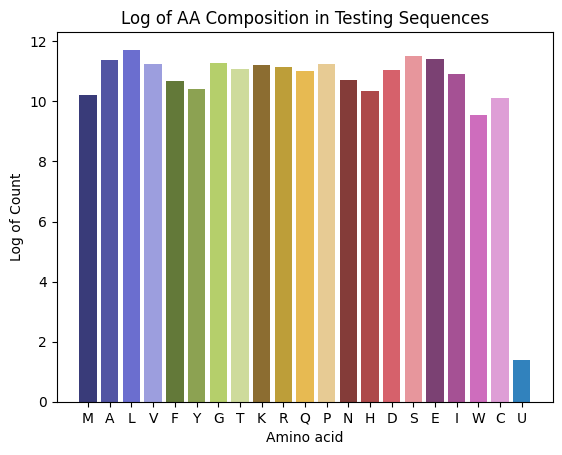

In [30]:
df = pd.read_csv('../test.csv')


def get_basecomp(s):
    for keys in s:
        res_test[keys] = res_test.get(keys, 0) + 1
    
res_test = {}    
df.sequence.apply(lambda s: get_basecomp(s))


# plt.bar(), np.log(list(res.values())),cmap=matplotlib.colors.Qualitative.Viridis)


keys= list(res_test.keys())
values = np.log(list(res_test.values()))
                
# Set the color map
cmap1 = cm.get_cmap('tab20b', 20)  # Get the 'tab20b' colormap
cmap2 = cm.get_cmap('tab20c', 20)  # Get the 'tab20c' colormap
colors1 = cmap1(np.linspace(0, 1, 20))
colors2 = cmap2(np.linspace(0, 1, 20))

# Combine colors from both colormaps and select the first 21
colors = np.vstack((colors1, colors2))[:21]

# Create bar plot
plt.bar(keys, values, color=colors)
plt.xlabel('Amino acid')
plt.ylabel('Log of Count')
plt.title('Log of AA Composition in Testing Sequences')
# plt.show()

plt.savefig('../Comp_Testing.png')
# plt.show()

/var/folders/cy/fs36cmbs1qqfq95ndcyk22mw0000gn/T/ipykernel_6530/831728175.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = cm.get_cmap('tab20b', 20)  # Get the 'tab20b' colormap
/var/folders/cy/fs36cmbs1qqfq95ndcyk22mw0000gn/T/ipykernel_6530/831728175.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = cm.get_cmap('tab20c', 20)  # Get the 'tab20c' colormap


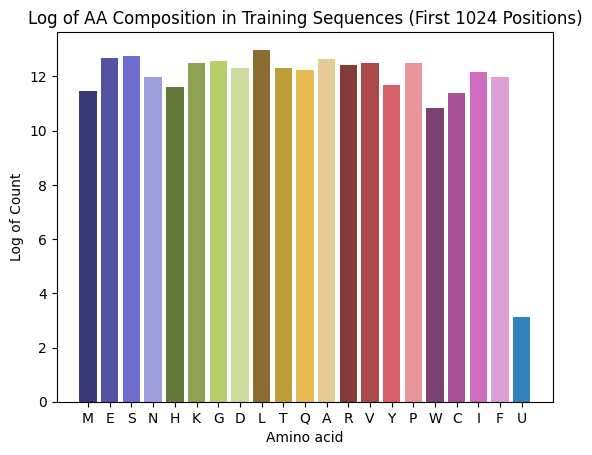

In [31]:
df = pd.read_csv('../train.csv')


def get_basecomp(s):
    if len(s) > 1024:
        s = s[0:1024]
        
    for keys in s:
        res_train_short[keys] = res_train_short.get(keys, 0) + 1
    
res_train_short = {}    
df.sequence.apply(lambda s: get_basecomp(s))


# plt.bar(), np.log(list(res.values())),cmap=matplotlib.colors.Qualitative.Viridis)


keys= list(res_train_short.keys())
values = np.log(list(res_train_short.values()))
                
# Set the color map
cmap1 = cm.get_cmap('tab20b', 20)  # Get the 'tab20b' colormap
cmap2 = cm.get_cmap('tab20c', 20)  # Get the 'tab20c' colormap
colors1 = cmap1(np.linspace(0, 1, 20))
colors2 = cmap2(np.linspace(0, 1, 20))

# Combine colors from both colormaps and select the first 21
colors = np.vstack((colors1, colors2))[:21]

# Create bar plot
plt.bar(keys, values, color=colors)
plt.xlabel('Amino acid')
plt.ylabel('Log of Count')
plt.title('Log of AA Composition in Training Sequences (First 1024 Positions)')
# plt.show()

plt.savefig('../Comp_Training_1024.png')
# plt.show()

/var/folders/cy/fs36cmbs1qqfq95ndcyk22mw0000gn/T/ipykernel_6530/2998644915.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = cm.get_cmap('tab20b', 20)  # Get the 'tab20b' colormap
/var/folders/cy/fs36cmbs1qqfq95ndcyk22mw0000gn/T/ipykernel_6530/2998644915.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = cm.get_cmap('tab20c', 20)  # Get the 'tab20c' colormap


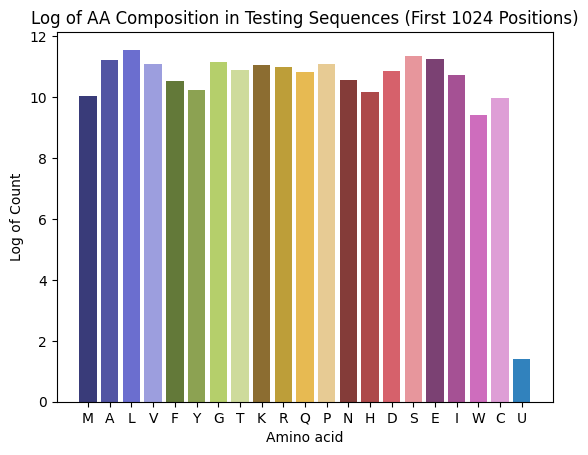

In [32]:
df = pd.read_csv('../test.csv')


def get_basecomp(s):
    if len(s) > 1024:
        s = s[0:1024]
        
    for keys in s:
        res_test_short[keys] = res_test_short.get(keys, 0) + 1
    
res_test_short = {}    
df.sequence.apply(lambda s: get_basecomp(s))


# plt.bar(), np.log(list(res.values())),cmap=matplotlib.colors.Qualitative.Viridis)


keys= list(res_test_short.keys())
values = np.log(list(res_test_short.values()))
                
# Set the color map
cmap1 = cm.get_cmap('tab20b', 20)  # Get the 'tab20b' colormap
cmap2 = cm.get_cmap('tab20c', 20)  # Get the 'tab20c' colormap
colors1 = cmap1(np.linspace(0, 1, 20))
colors2 = cmap2(np.linspace(0, 1, 20))

# Combine colors from both colormaps and select the first 21
colors = np.vstack((colors1, colors2))[:21]

# Create bar plot
plt.bar(keys, values, color=colors)
plt.xlabel('Amino acid')
plt.ylabel('Log of Count')
plt.title('Log of AA Composition in Testing Sequences (First 1024 Positions)')
# plt.show()

plt.savefig('../Comp_Testing_1024.png')
# plt.show()

### Tokenization + Embedding Generation

In [ ]:
### embeddings were generated by running python build_dataset_final2.py


# these batches were saved in kaggle/train and kaggle/validate

### Downstream visualization 

In [ ]:
# pip install umap-learn

In [4]:
# load embeddings from base directory 
# Run PCA 
# visualize with UMAP embedding 



In [3]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pathlib import Path

import umap

/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def load_data(directory):
    embeddings = []
    targets = []
    files = Path(directory).glob('*.pt')
    for file in files:
        data = torch.load(file)
        embeddings.append(data[0])  # Assuming data[0] is the embeddings tensor
        targets.append(data[1])  # Assuming data[1] is the target tensor
    embeddings = torch.cat(embeddings, dim=0).numpy()  # Concatenate and convert to numpy
    targets = torch.cat(targets, dim=0).numpy() if targets else None
    return embeddings, targets

In [5]:
def apply_pca(embeddings, n_components=2):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(embeddings)
    return principal_components

In [6]:
def plot_embedding(principal_components, targets=None, embedtype='PCA'):
    savefile='../saveembed_' + embedtype + '.png'
    plt.figure(figsize=(8, 6))
    if targets is not None:
        scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=targets, cmap='viridis', alpha=0.5)
        plt.colorbar(scatter)
    else:
        plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
    plt.xlabel(embedtype + ' 1')
    plt.ylabel(embedtype + ' 2')
    plt.title(embedtype + ' of Embeddings')
    
    plt.savefig(savefile)
    
    plt.show()

In [7]:
def apply_umap(data, n_components=2, n_neighbors=15, min_dist=0.1):
    reducer = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(data)
    return embedding



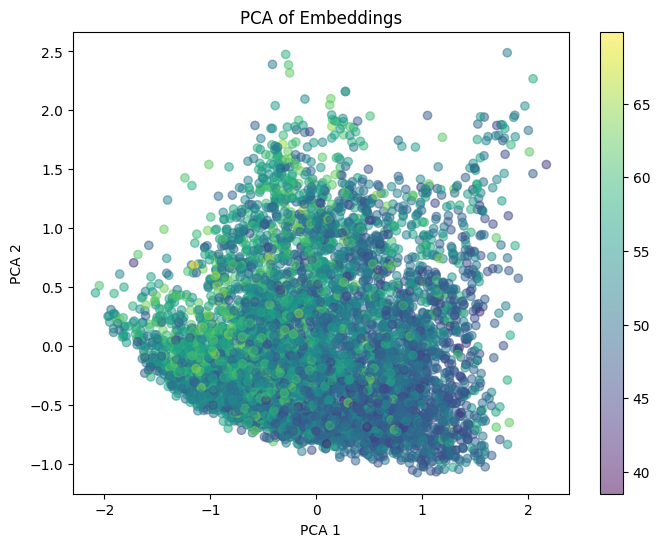

/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


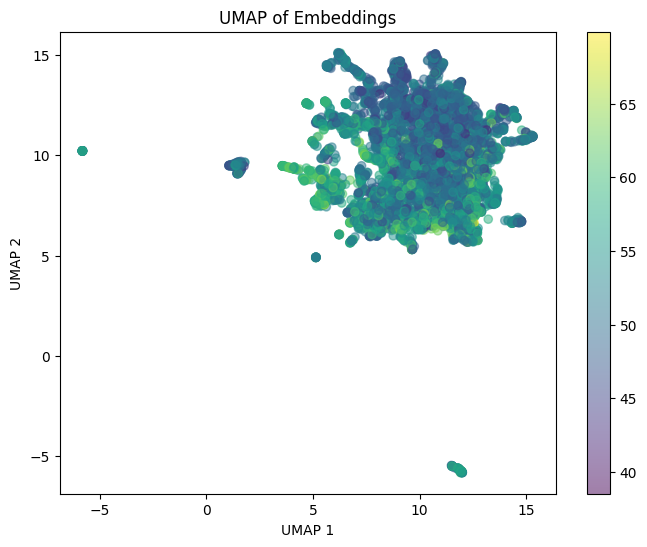

In [8]:
embeddings_dir = './kaggle_op/train/'  # Adjust path as needed
embeddings, targets = load_data(embeddings_dir)
principal_components = apply_pca(embeddings, n_components=50)
plot_embedding(principal_components, targets,embedtype='PCA')

umap_embedding = apply_umap(principal_components, n_components=2)  # Applying UMAP
plot_embedding(umap_embedding, targets,embedtype='UMAP')  # Reusing the plot function for UMAP


### Visualization of validation set

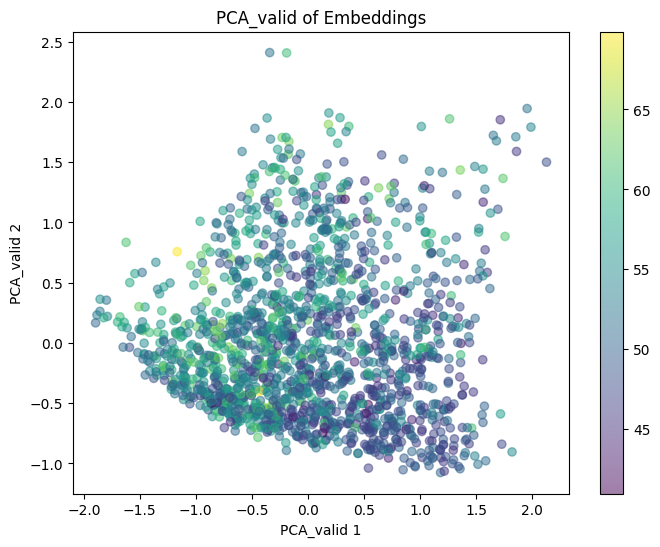

/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


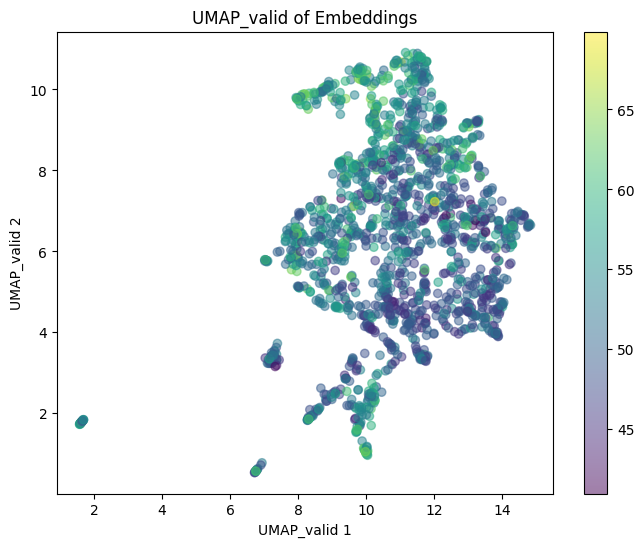

In [9]:
## load validation set, generate PCA embedding 
embeddings_dir = './kaggle_op/validate/'  # Adjust path as needed
embeddings_test, targets_test = load_data(embeddings_dir)
principal_components_test = apply_pca(embeddings_test, n_components=50)
plot_embedding(principal_components_test, targets_test,embedtype='PCA_valid')

umap_embedding_test = apply_umap(principal_components_test, n_components=2)  # Applying UMAP
plot_embedding(umap_embedding_test, targets_test,embedtype='UMAP_valid')  # Reusing the plot function for UMAP


#### Transfer Learning Approaches (modified from ESM variant prediction example)

In [10]:
# print(Xs_train.shape,Xs_test.shape)

In [11]:
# embeddings.shape

In [12]:
# embeddings_test.shape

In [13]:
# Xs_train = embeddings
# ys_train = targets
 
# Xs_test = embeddings_test
# ys_test = targets


# utilize cross validation, so no need of validation set 
Xs_train = np.concatenate((embeddings,embeddings_test))
ys_train = np.concatenate((targets,targets_test))
# ys_train = np.concatenate(targets,targets_test)

In [14]:
# targets.shape

In [15]:
import scipy
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor


In [16]:
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer

In [116]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


def spearman_scoring(y_true, y_pred):
    # Calculate the Spearman correlation
    correlation, _ = spearmanr(y_true, y_pred)
    return correlation


spearman_scorer = make_scorer(spearman_scoring)


In [18]:
# Define the number of PCA components
num_pca_components = 60

# Define the parameter grid
param_grid = [
    {
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': [5, 10],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'model__leaf_size': [15, 30],
        'model__p': [1, 2],
    },
    {
        'model': [SVR()],
        'model__C': [0.1, 1.0, 10.0],
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__degree': [3],
        'model__gamma': ['scale'],
    },
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [20],
        'model__criterion': ['squared_error', 'absolute_error'],
        'model__max_features': ['sqrt', 'log2'],
        'model__min_samples_split': [5, 10],
        'model__min_samples_leaf': [1, 4]
    },
    
    {
        'model': [MLPRegressor()],
        'model__hidden_layer_sizes': [(32,), (32, 16)],  
        'model__activation': ['relu', 'tanh'],
        'model__solver': ['adam', 'sgd'],
        'model__alpha': [0.0001, 0.001],  # Regularization term
        'model__learning_rate': ['constant', 'adaptive'],
        'model__max_iter': [500]  #  iterations for training
    }
]



In [20]:

# Create the pipeline
pipe = Pipeline([
    ('pca', PCA(n_components=num_pca_components)),
    ('model', None)  # Placeholder for the model
])

# grid search CV
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=spearman_scorer,  # Use the Spearman scorer
    refit=True, # necessary otherwise trouble with testing
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search
grid.fit(Xs_train, ys_train)

# Extract results
results_df = pd.DataFrame.from_dict(grid.cv_results_)
best_model = grid.best_estimator_

# Output results
print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimizat

/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge

/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/esmtherm/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'model': KNeighborsRegressor(), 'model__algorithm': 'kd_tree', 'model__leaf_size': 15, 'model__n_neighbors': 10, 'model__p': 2, 'model__weights': 'distance'}
Best cross-validation score: 0.76


In [21]:
# cls_list = [KNeighborsRegressor, SVR, RandomForestRegressor]
# param_grid_list = [knn_grid, svm_grid, rfr_grid]

In [22]:
# # make sure data preprocessing (PCA here) is run inside CV to avoid data leakage
# pipe = Pipeline(
#     steps = (
#         ('pca', PCA(num_pca_components)),
#         ('model', 'passthrough')
#     )
# )

# result_list = []
# grid_list = []
# for cls_name, param_grid in zip(cls_list, param_grid_list):
#     print(cls_name)
#     grid = GridSearchCV(
#         estimator = pipe,
#         param_grid = param_grid,
#         scoring = 'r2',
#         verbose = 1,
#         n_jobs = -1 # use all available cores
#     )
#     grid.fit(Xs_train, ys_train)
#     result_list.append(pd.DataFrame.from_dict(grid.cv_results_))
#     grid_list.append(grid)

In [ ]:
# try again 

In [117]:
# Define the number of PCA components
num_pca_components = 150

# Define the parameter grid
param_grid = [
    
    
    {
        'model': [MLPRegressor()],
        'model__hidden_layer_sizes': [(256,), (256, 128), (256, 128, 64)],  
        'model__activation': ['relu', 'tanh'],
        'model__solver': ['adam', 'sgd'],
        'model__alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization term
        'model__learning_rate': ['constant', 'adaptive'],
        'model__max_iter': [1000]  #  iterations for training
    }
]



In [ ]:


# Create the pipeline
pipe = Pipeline([
    ('pca', PCA(n_components=num_pca_components)),
    ('model', None)  # Placeholder for the model
])

# grid search CV
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=spearman_scorer,  # Use the Spearman scorer
    refit=True, # necessary otherwise trouble with testing
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search
grid.fit(Xs_train, ys_train)

# Extract results
results_df = pd.DataFrame.from_dict(grid.cv_results_)
best_model = grid.best_estimator_

# Output results
print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


## Results 

In [ ]:
results_df

## Evaluation on Test Set 

##### load test data & evaluate

In [ ]:
def load_data_test(directory):
    embeddings = []
    # targets = []
    # files = Path(directory).glob('*.pt') 
    # needed to hard code paths due to ordering
    filenames = [Path(directory + 'test_embeddings_targets_batch_' + str(entry) + '.pt') for entry in range(8)]
    print(filenames)
    for file in filenames:
        data = torch.load(file)
        # print(data.shape)
        #return
        embeddings.append(data)  # Assuming data[0] is the embeddings tensor
        # targets.append(data[1])  # Assuming data[1] is the target tensor
    # print(len(embeddings))
    embeddings = torch.cat(embeddings, dim=0).numpy()  # Concatenate and convert to numpy
    # targets = torch.cat(targets, dim=0).numpy() if targets else None
    return embeddings # , targets

In [ ]:
embeddings_dir = './kaggle_op/test/'  # Adjust path as needed
embeddings_op = load_data_test(embeddings_dir)
print(embeddings_op.shape)

In [ ]:
Xs_test = embeddings_op

In [ ]:
# # from sklearn.metrics import r2_score
# import scipy.stats

# # Assuming Xs_test and ys_test are defined
# for grid in grid_list:
#     if hasattr(grid, 'predict'):
#         print(grid.best_estimator_.get_params()["steps"][1][1])  # Get the model details from the estimator
#         preds = grid.predict(Xs_test)
#         #print(f'R^2 Score: {r2_score(ys_test, preds)}')
#         #print(f'Spearman Correlation: {scipy.stats.spearmanr(ys_test, preds)}')
#     else:
#         print(grid)
#         print("This GridSearchCV instance is not fitted or refit parameter was set to False.")
#     print('\n', '-' * 80, '\n')

In [ ]:
best_model

In [ ]:
preds = best_model.predict(Xs_test)

In [ ]:
preds

### hack, since order wasn't saved 

In [ ]:
test_ip = pd.read_csv("./kaggle_op//test/all_testing.csv") 

In [ ]:
test_ip['pred'] = preds

In [ ]:
test_ip

In [ ]:
tmp = pd.read_csv("../test.csv")

In [ ]:
# test_ip.loc[6125,]

In [ ]:
tmp

In [ ]:
list(test_ip[test_ip['id']==entry]['pred'].values)[0]

In [ ]:
tmp['target'] = ''
for entry in tmp['id']:
    tmp.loc[tmp['id']==entry,'target'] = list(test_ip[test_ip['id']==entry]['pred'].values)[0]

In [ ]:
tmp

In [ ]:
del tmp['sequence']
# del tmp['pred']

In [ ]:
tmp.to_csv("../prediction_final.csv",index=False)

In [115]:
# with open("../prediction_final.csv", "w") as f:
#         f.write("id,target\n")
#         cnt = 0
#         for entry in test_ip.index:
#             f.write(f"{entry},{preds[cnt]}\n")
#             cnt = cnt + 1